In [58]:
%matplotlib inline
import numpy as np
import pickle
import matplotlib 
from matplotlib import pyplot as plt
import pandas as pd
import h5py
import yaml
from matplotlib.colors import LogNorm
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [ ]:
#deep_som_i.npy and z_deep_som.npy have 4096 galaxies with i-band mag and spectroscopic red shift

In [59]:
data_dir = "/Users/miabeatty/Desktop/DeepSOM/"
#'/global/cfs/cdirs/des/boyan/sompz_output/y6_data_10000Tile_final_unblind/noshear/weighted_pile3_oldbinning/som_figures/'

In [60]:
z_deep_som = np.load(data_dir + 'z_deep_som.npy')
stdz_div_1pmean_deep_som = np.load(data_dir + 'stdz_div_1pmean_deep_som.npy')
nc_spec = np.load(data_dir + 'nc_spec.npy')
nc_deep_balrog = np.load(data_dir + 'nc_deep_balrog.npy')
deep_som_i = np.load(data_dir + 'deep_som_i.npy')

In [61]:
def truncate_colormap(cmap, minval=0.0, maxval=0.9, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

# Load the reversed Spectral colormap
original_cmap = plt.get_cmap('Spectral_r')

# Truncate to use only 0-80% (avoid intense reds)
truncated_cmap = truncate_colormap(original_cmap, 0.0, 0.95)

cmap = truncated_cmap

In [62]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})

In [63]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

fig, axs = plt.subplots(2,4, figsize=(20,8),dpi = 300)
cmap = truncated_cmap #'Spectral_r'
#cmap = 'RdYlBu_r'
# Deep SOM
im1 = sns.heatmap(z_deep_som.reshape(64, 64), cmap=cmap, vmin=-0.00, vmax=1.5, ax=axs[0,0], cbar=True, square=True, cbar_kws={ "shrink": 0.98, "ticks": [0, 0.5, 1.0, 1.5, 2.0]})
axs[0,0].set_title(r'$\langle z\!\mid\!c \rangle$', fontsize=18)

im2 = sns.heatmap(stdz_div_1pmean_deep_som.reshape(64, 64), cmap=cmap, vmin=-0.0, vmax=0.40, ax=axs[0,1], cbar=True, square=True, cbar_kws={"shrink": 0.98, "ticks": [0, 0.1, 0.2, 0.3, 0.4]})
axs[0,1].set_title( r'$\sigma\left( z \!\mid\! c \right)/(1+ \langle z\!\mid\!c \rangle)$', fontsize=18)

im3 = sns.heatmap(nc_spec.reshape(64, 64), cmap=cmap, norm=LogNorm(vmin=1, vmax=1e3), ax=axs[0,2], cbar=True, square=True, cbar_kws={ "shrink": 0.98, "ticks": [1, 10, 1e2, 1e3]})
axs[0,2].set_title( r'$n_{\mathrm{spec}}(c)$', fontsize=18)

im4 = sns.heatmap(nc_deep_balrog.reshape(64, 64), cmap=cmap, norm=LogNorm(vmin=1, vmax=1e3),  ax=axs[0,3], cbar=True, square=True, cbar_kws={})
axs[0,3].set_title( r'$n_{\mathrm{deep}}(c)$', fontsize=18)

ims= [im1, im2, im3, im4]
for im in ims:
    cbar = im.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)

for i in range(2):
    for j in range(4):
        axs[i,j].axis('off')   
        
colorbar = im.collections[0].colorbar
colorbar.ax.tick_params(labelsize=14) 

plt.savefig('SOM plots.png', bbox_inches='tight', dpi = 300)

In [64]:
sns.heatmap(deep_som_i.reshape(64,64), cmap=cmap, vmin=20, vmax=25, cbar=True, square=True, cbar_kws={ "shrink": 0.98})

<Axes: >

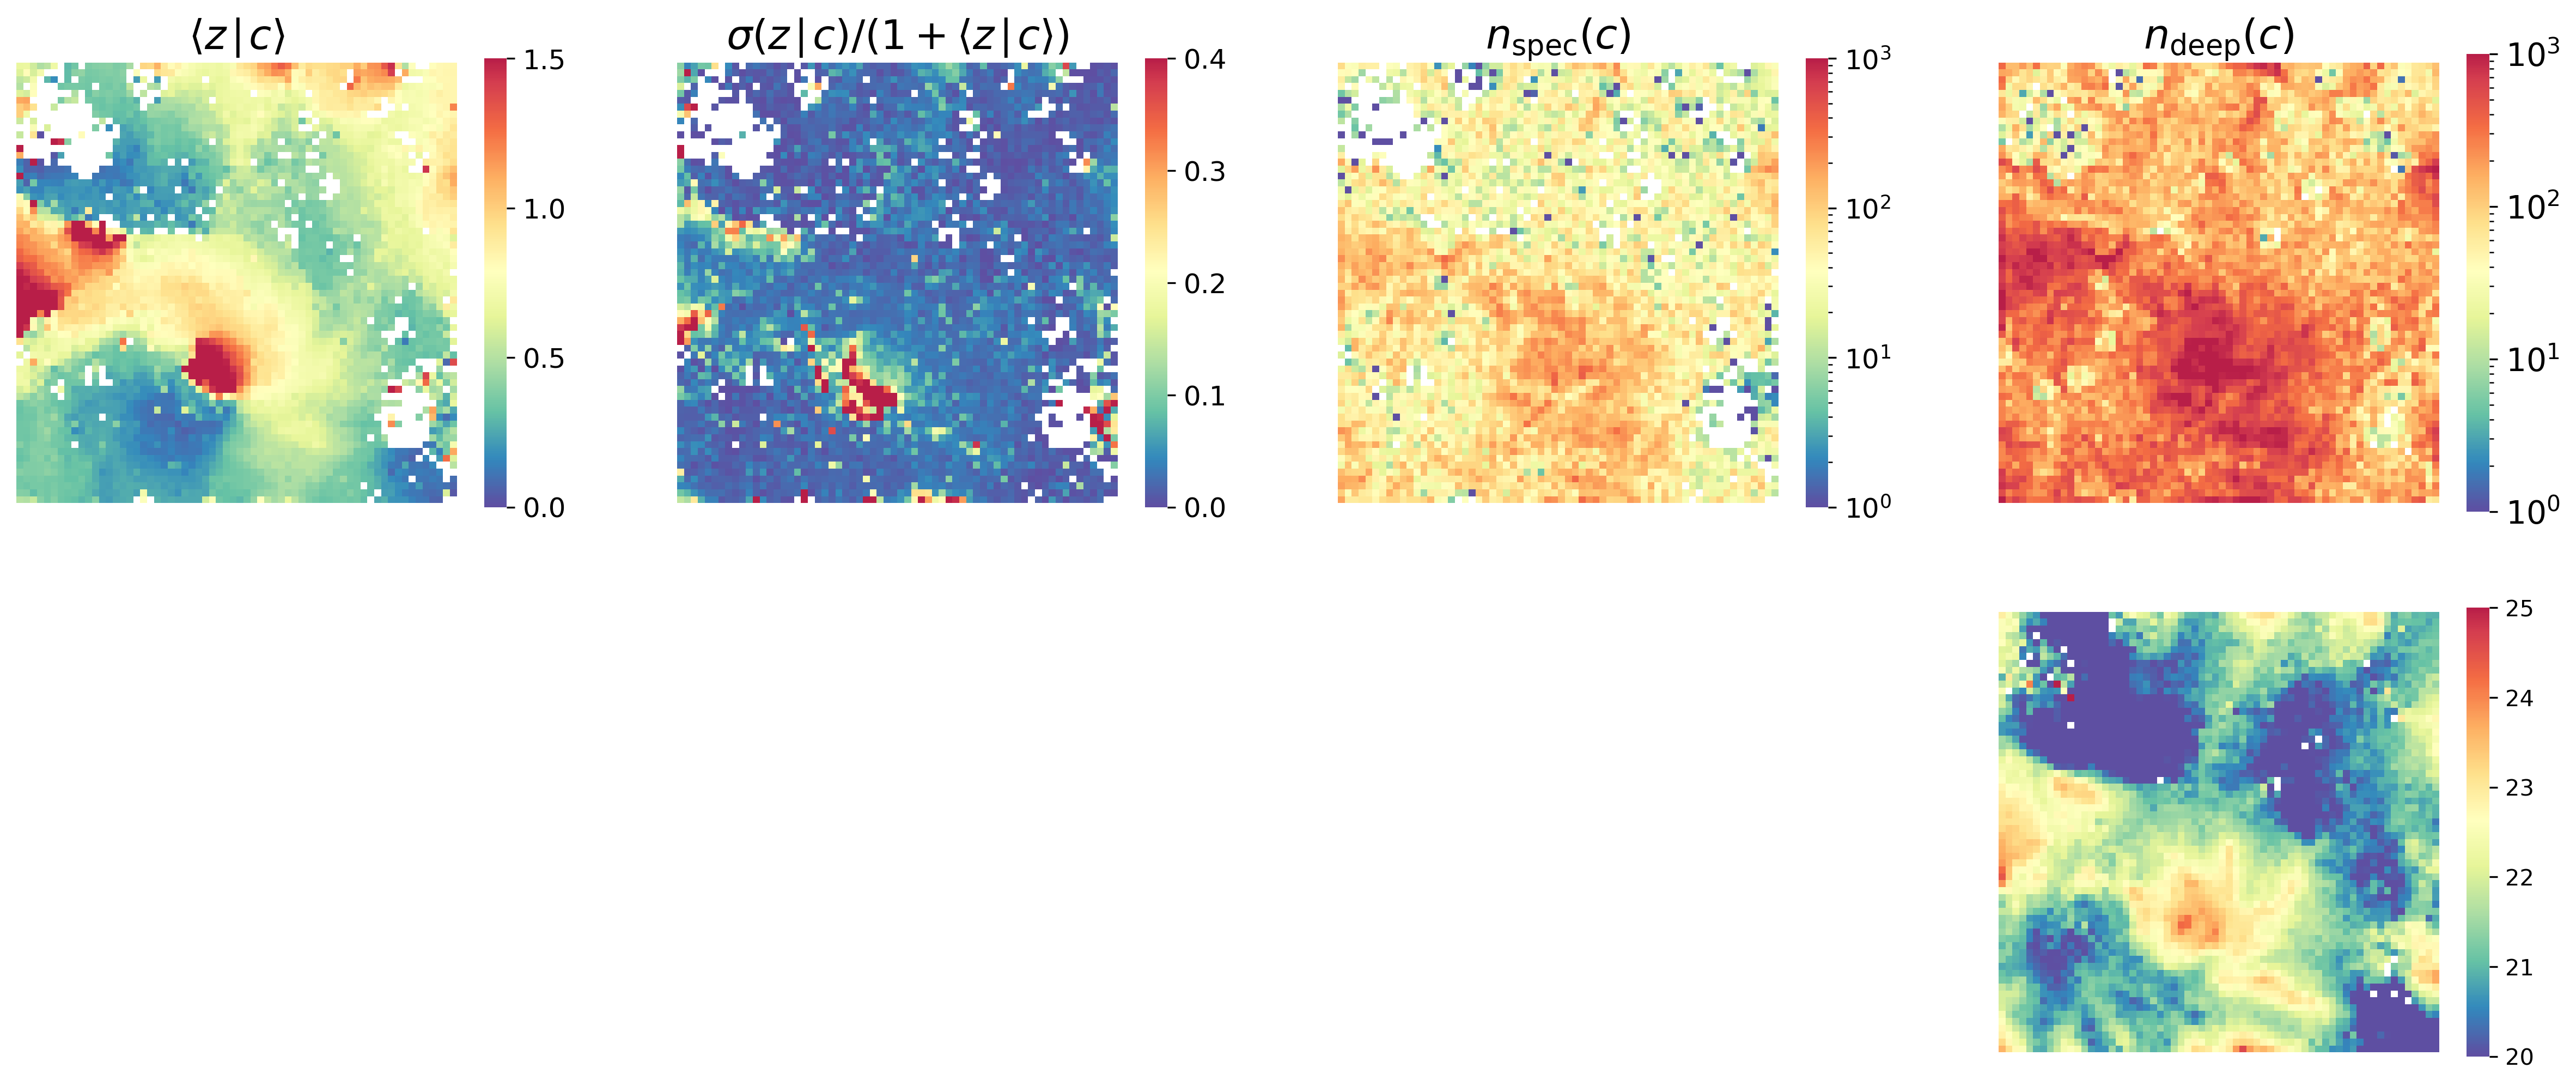

In [65]:
plt.show()

In [68]:
#to graph by color I need a catalog that has multiplebands (cosmos deep)
deep = pd.read_pickle("COSMOS30-spectra-DES_deepflux.pkl")


In [73]:
# Compute g - i color
deep['COLOR_GI'] = deep['BDF_MAG_DERED_CALIB_G'] - deep['BDF_MAG_DERED_CALIB_I']

# Compute the median color per SOM cell
color_gi_per_cell = deep.groupby('SOM_CELL')['COLOR_GI'].median()

# Fill SOM map (64x64) with color values
som_color_map = np.full((64*64,), np.nan)
for cell, val in color_gi_per_cell.items():
    som_color_map[int(cell)] = val
som_color_map = som_color_map.reshape(64, 64)

# Plot using your existing SOM style
plt.figure(figsize=(6,6))
sns.heatmap(som_color_map, cmap='coolwarm', square=True, cbar_kws={'label': 'g - i Color'})
plt.title('g - i Color across SOM Cells')
plt.axis('off')
plt.show()

KeyError: 'SOM_CELL'

In [74]:
from minisom import MiniSom
import numpy as np

# Load trained weights
weights = np.load("som_deep_64_64.npy")

# Get SOM dimensions and input size from weight shape
n_x, n_y, n_features = weights.shape

# Reinitialize the SOM with the same dimensions
som = MiniSom(n_x, n_y, n_features, sigma=1.0, learning_rate=0.5)
som._weights = weights  # set the trained weights manually


ModuleNotFoundError: No module named 'minisom'